<a href="https://colab.research.google.com/github/NickBourdeau/DS2020/blob/master/Sabermetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I obtained a dataset containing 2016 MLB player batting statistics from data.world and imported it using its link.

In [0]:
import pandas as pd

1. In the year of 2016, which players performed best compared to the rest of the league?
2.  Statistically, how did some of these high achieving player stick out compared to some fo the other highest achieving players?
3.  Were there some players who were drastically overpaid compared to the competition?
4. What players were significantly underpaid and performed as wellm, if not better than competition making almost 40 times their yearly salary?
5. What MLB teams typically pay their players more than others, and how do team average statistics relate to yearly salary?

In [0]:
pd1 = pd.read_csv('https://query.data.world/s/3b7brp7vzsabtspuojccjeixfgbcf4')
player_data = pd.read_csv('https://query.data.world/s/3b7brp7vzsabtspuojccjeixfgbcf4')
pd1.head(5)

,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,Team,Franchise,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,aardsda01,David Aardsma,215,75,R,R,2004,NL,SFN,San Francisco Giants,San Francisco Giants,11,0,0,0,0,0,0,0,0,0,0,300000,0,0,0,0,0
1,aardsda01,David Aardsma,215,75,R,R,2007,AL,CHA,Chicago White Sox,Chicago White Sox,25,0,0,0,0,0,0,0,0,0,0,387500,0,0,0,0,0
2,aardsda01,David Aardsma,215,75,R,R,2008,AL,BOS,Boston Red Sox,Boston Red Sox,47,1,0,0,0,0,0,0,0,0,1,403250,0,0,0,0,1
3,aardsda01,David Aardsma,215,75,R,R,2009,AL,SEA,Seattle Mariners,Seattle Mariners,73,0,0,0,0,0,0,0,0,0,0,419000,0,0,0,0,0
4,aardsda01,David Aardsma,215,75,R,R,2012,AL,NYA,New York Yankees,New York Yankees,1,0,0,0,0,0,0,0,0,0,0,500000,0,0,0,0,0


Using various sabermetric formulas, I added new columns including many important and useful baseball hitting statistics.  They include: 1B (Singles), BA (Batting Average), OBP (On-Base Percentage), BABIP (Batter's Balls in Play), SLG (Slugging Percentage), OPS (On Base plus Slugging), TB (Total Bases), RC (Runs Created), ISO (Isolated Power), uBB (Unintentional Walks), wOPA (Weighted On-Base Average), PA/SO (Plate Appearances per Strikeout), and AB/HR (At Bats per Home Run).

In [0]:
pd1 = pd1[pd1.AB >= 100]
pd1.loc[:, '1B'] = pd1['H'] - pd1['2B'] - pd1['3B'] - pd1['HR']
pd1.loc[:, 'BA'] = pd1['H']/pd1['AB']
pd1.loc[:, 'OBP'] = (pd1['H'] + pd1['BB'] + pd1['HBP'])/(pd1['AB'] + pd1['BB'] + pd1['HBP'] + pd1['SF'])
pd1.loc[:,'BABIP'] = (pd1['H']-pd1['HR'])/(pd1['AB'] - pd1['SO'] - pd1['HR'] + pd1['SF'])
pd1.loc[:, 'SLG'] = ((pd1['HR']*4)+(pd1['3B']*3)+(pd1['2B']*2)+(pd1['1B']))/pd1['AB']
pd1.loc[:, 'OPS'] = pd1['OBP'] + pd1['SLG']
pd1.loc[:, 'TB'] = pd1['1B'] + (2*pd1['2B']) + (3*pd1['3B']) + (4 * pd1['HR'])
pd1.loc[:, 'RC'] = (pd1['TB'] * (pd1['H'] + pd1['BB']))/(pd1['AB'] + pd1['BB'])
pd1.loc[:, 'ISO'] = (pd1['2B'] + (2*pd1['3B']) + (3*pd1['HR']))/pd1['AB']
pd1.loc[:, 'uBB'] = pd1['BB'] - pd1['IBB']
pd1.loc[:, 'wOBA'] = (0.69*pd1['uBB'] + 0.72*pd1['HBP'] + 0.89*pd1['1B'] + 1.27*pd1['2B'] + 1.62*pd1['3B'] + 2.1*pd1['HR'])/(pd1['AB'] + pd1['BB'] - pd1['IBB'] + pd1['SF'] + pd1['HBP'])
pd1.loc[:, 'PA/SO'] = pd1['PA']/pd1['SO']
pd1.loc[:, 'AB/HR'] = pd1['AB']/pd1['HR']
pd1.head(5)

,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,Team,Franchise,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA,1B,BA,OBP,BABIP,SLG,OPS,TB,RC,ISO,uBB,wOBA,PA/SO,AB/HR
17,abbotje01,Jeff Abbott,190,74,R,L,1998,AL,CHA,Chicago White Sox,Chicago White Sox,89,244,33,68,14,1,12,41,3,9,28,175000,1,0,2,5,261,41,0.278689,0.298450,0.267943,0.491803,0.790253,120,36.521739,0.213115,8,0.337004,9.321429,20.333333
19,abbotje01,Jeff Abbott,190,74,R,L,2000,AL,CHA,Chicago White Sox,Chicago White Sox,80,215,31,59,15,1,3,29,2,21,38,255000,1,2,2,1,242,40,0.274419,0.343096,0.320000,0.395349,0.738445,85,28.813559,0.120930,20,0.326933,6.368421,71.666667
32,abbotku01,Kurt Abbott,180,71,R,R,1994,NL,FLO,Florida Marlins,Florida Marlins,101,345,41,86,17,3,9,33,3,16,98,109000,1,5,3,2,372,57,0.249275,0.290761,0.320833,0.394203,0.684964,136,38.426593,0.144928,15,0.299809,3.795918,38.333333
33,abbotku01,Kurt Abbott,180,71,R,R,1995,NL,FLO,Florida Marlins,Florida Marlins,120,420,60,107,18,7,17,60,4,36,110,119000,4,5,2,5,472,65,0.254762,0.317597,0.302013,0.452381,0.769978,190,59.583333,0.197619,32,0.332100,4.290909,24.705882
34,abbotku01,Kurt Abbott,180,71,R,R,1996,NL,FLO,Florida Marlins,Florida Marlins,109,320,37,81,18,7,8,33,3,22,99,250000,1,3,4,0,350,48,0.253125,0.307246,0.342723,0.428125,0.735371,137,41.260234,0.175000,21,0.320843,3.535354,40.000000


In [0]:
pd1 = pd1[['Player Name', 'Season','AB','H','HR','RBI', 'BA', 'SLG', 'SO', 'salary', 'OBP', 'BABIP', 'OPS', 'TB', 'RC', 'ISO', 'uBB', 'wOBA', 'PA/SO', 'AB/HR']]
pd1.head(5)


(112, 20)

I then filtered the DataFrame to include only batters above MLB average statistics for the year of 2016

In [0]:
pd1 = pd1[(pd1['Season'] >= 2016) & (pd1['BA'] >= .255) & (pd1['SLG'] >= .417) & (pd1['OBP'] >= .322) & (pd1['OPS'] >= .739)]
pd1.head(5)


,Player Name,Season,AB,H,HR,RBI,BA,SLG,SO,salary,OBP,BABIP,OPS,TB,RC,ISO,uBB,wOBA,PA/SO,AB/HR
81,Jose Abreu,2016,624,183,25,100,0.293269,0.467949,125,11666667,0.352518,0.327122,0.820467,292,100.089419,0.174679,40,0.355247,5.616000,24.960000
436,Jose Altuve,2016,640,216,24,96,0.337500,0.531250,70,3687500,0.396359,0.347197,0.927609,340,134.057143,0.193750,49,0.397923,10.400000,26.666667
627,Elvis Andrus,2016,506,153,8,69,0.302372,0.438735,70,15333333,0.361702,0.333333,0.800437,222,80.289331,0.136364,45,0.349947,8.142857,63.250000
698,Nolan Arenado,2016,618,182,41,133,0.294498,0.569579,103,5000000,0.362069,0.292531,0.931648,352,128.279883,0.275081,58,0.394650,6.854369,15.073171
1776,Brandon Belt,2016,542,149,17,82,0.274908,0.474170,148,6200000,0.393893,0.346457,0.868063,257,100.651703,0.199262,100,0.379724,4.452703,31.882353


In [0]:
pd1 = pd1.sort_values('salary', ascending = True)
pd1.head(5)

,Player Name,Season,AB,H,HR,RBI,BA,SLG,SO,salary,OBP,BABIP,OPS,TB,RC,ISO,uBB,wOBA,PA/SO,AB/HR
22891,Scott Schebler,2016,257,68,9,40,0.264591,0.431907,59,507500,0.329787,0.312169,0.761694,111,34.989130,0.167315,17,0.333857,4.813559,28.555556
17990,Tyler Naquin,2016,321,95,14,43,0.295950,0.514019,112,507500,0.371901,0.411168,0.885920,165,60.546218,0.218069,32,0.381448,3.294643,22.928571
24472,Trevor Story,2016,372,101,27,72,0.271505,0.567204,130,507500,0.341404,0.342593,0.908609,211,70.506143,0.295699,33,0.388881,3.207692,13.777778
6713,Brandon Drury,2016,461,130,16,53,0.281996,0.457701,100,508900,0.328657,0.326648,0.786358,211,69.046748,0.175705,29,0.341529,5.010000,28.812500
23115,Corey Seager,2016,627,193,26,72,0.307815,0.511962,133,510000,0.365357,0.355319,0.877318,321,116.427313,0.204147,49,0.379428,5.203008,24.115385


In [0]:
mean_ba = pd1.groupby(by = ['Player Name']).sum()
mean_ba.mean()['BA']

0.29518525422486513

In [0]:
mean_slg = pd1.groupby(by = ['Player Name']).sum()
mean_slg.mean()['SLG']

0.4951070711741079

In [0]:
mean_obp = pd1.groupby(by = ['Player Name']).sum()
mean_obp.mean()['OBP']

0.3669788532833442

In [0]:
mean_ops = pd1.groupby(by = ['Player Name']).sum()
mean_ops.mean()['OPS']

0.862085924457452

In [0]:
mean_rc = pd1.groupby(by = ['Player Name']).sum()
mean_rc.mean()['RC']

83.54330121205625

In [0]:
mean_woba = pd1.groupby(by = ['Player Name']).sum()
mean_woba.mean()['wOBA']

0.3739940534436067

In [0]:
mean_salary = pd1.groupby(by = ['Player Name']).sum()
mean_salary = mean_salary.mean()['salary']
mean_salary = mean_salary / 1000000
mean_salary

7.5731486880733945

To make it easier to read on graphs, I changed the Salary column to be salary on the scale of one million dollars.

In [0]:
pd1.loc[:, 'TB/AB'] = pd1['TB'] / pd1['AB']
pd1['salary'] *= (1/1000000)
pd1.head(5)

,Player Name,Season,AB,H,HR,RBI,BA,SLG,SO,salary,OBP,BABIP,OPS,TB,RC,ISO,uBB,wOBA,PA/SO,AB/HR,TB/AB
22891,Scott Schebler,2016,257,68,9,40,0.264591,0.431907,59,0.5075,0.329787,0.312169,0.761694,111,34.989130,0.167315,17,0.333857,4.813559,28.555556,0.431907
17990,Tyler Naquin,2016,321,95,14,43,0.295950,0.514019,112,0.5075,0.371901,0.411168,0.885920,165,60.546218,0.218069,32,0.381448,3.294643,22.928571,0.514019
24472,Trevor Story,2016,372,101,27,72,0.271505,0.567204,130,0.5075,0.341404,0.342593,0.908609,211,70.506143,0.295699,33,0.388881,3.207692,13.777778,0.567204
6713,Brandon Drury,2016,461,130,16,53,0.281996,0.457701,100,0.5089,0.328657,0.326648,0.786358,211,69.046748,0.175705,29,0.341529,5.010000,28.812500,0.457701
23115,Corey Seager,2016,627,193,26,72,0.307815,0.511962,133,0.5100,0.365357,0.355319,0.877318,321,116.427313,0.204147,49,0.379428,5.203008,24.115385,0.511962


In [0]:
pd2 = pd1[['Player Name','salary', 'AB', 'BA', 'SLG','OBP', 'OPS', 'RC', 'wOBA', 'TB/AB']]
pd2.head(5)

,Player Name,salary,AB,BA,SLG,OBP,OPS,RC,wOBA,TB/AB
22891,Scott Schebler,0.5075,257,0.264591,0.431907,0.329787,0.761694,34.989130,0.333857,0.431907
17990,Tyler Naquin,0.5075,321,0.295950,0.514019,0.371901,0.885920,60.546218,0.381448,0.514019
24472,Trevor Story,0.5075,372,0.271505,0.567204,0.341404,0.908609,70.506143,0.388881,0.567204
6713,Brandon Drury,0.5089,461,0.281996,0.457701,0.328657,0.786358,69.046748,0.341529,0.457701
23115,Corey Seager,0.5100,627,0.307815,0.511962,0.365357,0.877318,116.427313,0.379428,0.511962


In [0]:
pd2.columns = ['Player Name', 'Salary', 'AB', 'BA', 'SLG', 'OBP', 'OPS', 'RC', 'wOBA', 'TB/AB']
pd2.head(5)

,Player Name,Salary,AB,BA,SLG,OBP,OPS,RC,wOBA,TB/AB
22891,Scott Schebler,0.5075,257,0.264591,0.431907,0.329787,0.761694,34.989130,0.333857,0.431907
17990,Tyler Naquin,0.5075,321,0.295950,0.514019,0.371901,0.885920,60.546218,0.381448,0.514019
24472,Trevor Story,0.5075,372,0.271505,0.567204,0.341404,0.908609,70.506143,0.388881,0.567204
6713,Brandon Drury,0.5089,461,0.281996,0.457701,0.328657,0.786358,69.046748,0.341529,0.457701
23115,Corey Seager,0.5100,627,0.307815,0.511962,0.365357,0.877318,116.427313,0.379428,0.511962


In [0]:
pd3 = pd2
pd3.head(5)

,Player Name,Salary,AB,BA,SLG,OBP,OPS,RC,wOBA,TB/AB
22891,Scott Schebler,0.5075,257,0.264591,0.431907,0.329787,0.761694,34.989130,0.333857,0.431907
17990,Tyler Naquin,0.5075,321,0.295950,0.514019,0.371901,0.885920,60.546218,0.381448,0.514019
24472,Trevor Story,0.5075,372,0.271505,0.567204,0.341404,0.908609,70.506143,0.388881,0.567204
6713,Brandon Drury,0.5089,461,0.281996,0.457701,0.328657,0.786358,69.046748,0.341529,0.457701
23115,Corey Seager,0.5100,627,0.307815,0.511962,0.365357,0.877318,116.427313,0.379428,0.511962


In [0]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
plot_data = [pd3['BA'], pd3['SLG'], pd3['OBP'], pd3['OPS'], pd3['wOBA']]


I then created various graphs to demonstrate the data including batters above 2016 MLB average statistics.

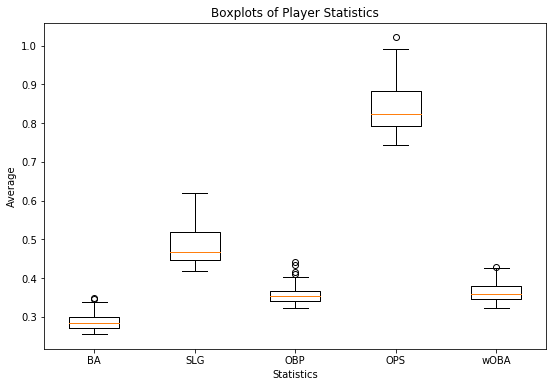

In [0]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(plot_data)
ax.set_xticklabels(['BA', 'SLG', 'OBP', 'OPS', 'wOBA'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.xlabel('Statistics')
plt.ylabel('Average')
plt.title('Boxplots of Player Statistics')

plt.savefig('abovestatistics.png', dpi=1000)

(array([ 4., 15., 26., 21., 12., 13.,  9.,  6.,  3.,  3.]),
 array([0.32188776, 0.33252222, 0.34315669, 0.35379115, 0.36442562,
        0.37506008, 0.38569455, 0.39632901, 0.40696348, 0.41759794,
        0.42823241]),
 <a list of 10 Patch objects>)

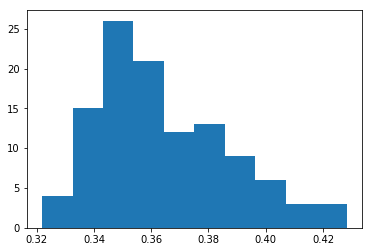

In [0]:
import matplotlib.pyplot as plt
plt.hist(pd2['wOBA'])

In [0]:
import seaborn as sns

No handles with labels found to put in legend.


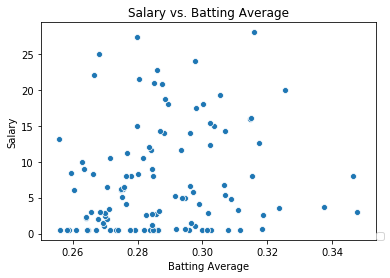

In [0]:
scatter = sns.scatterplot(x=pd3['BA'], y = pd3['Salary'])
scatter.legend(loc=(1,0))
plt.title('Salary vs. Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Salary')

plt.savefig('SalaryvsBA.png', dpi=1000)

In [0]:
from google.colab import files
files.download('SalaryvsBA.png')

No handles with labels found to put in legend.


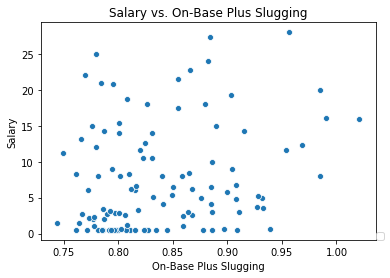

In [0]:
scatter = sns.scatterplot(x=pd3['OPS'], y = pd3['Salary'])
scatter.legend(loc=(1,0))
plt.title('Salary vs. On-Base Plus Slugging')
plt.xlabel('On-Base Plus Slugging')
plt.ylabel('Salary')

plt.savefig('SalaryvOPS.png', dpi=1000)

In [0]:
from google.colab import files
files.download('SalaryvOPS.png')

Next I want to look at which players in 2016 are over and under paid in the MLB using On Base Percentage (OBP) and wOBA(Weighted On-Base Average).

In [0]:
on_base = pd3.groupby('Player Name')[['OPS', 'Salary']]

In [0]:
obm = on_base.mean()
obm.head(10)

,OPS,Salary
Player Name,,
Aaron Hill,0.779881,12.000000
Adam Eaton,0.790055,2.750000
Adrian Beltre,0.879253,18.000000
Adrian Gonzalez,0.783990,21.000000
Albert Pujols,0.780075,25.000000
Andrew McCutchen,0.766062,13.208333
Angel Pagan,0.749663,11.250000
Anthony Rendon,0.797494,2.800000
Anthony Rizzo,0.928355,5.285714


In [0]:
def new_colors(x):
  x = float(x)
  if x > 0.9:
    return 'red'
  elif x <= 0.8999 and x > 0.8334:
    return 'orange'
  elif x <= 0.8333 and x > 0.7667:
    return 'yellow'
  elif x <= 0.7666 and x > 0.7:
    return 'pink'
  elif x <= 0.6999 and x > .6334:
    return 'blue'
  else:
    return 'green'

obm['colors'] = obm['OPS'].apply(new_colors)
obm.head()

,OPS,Salary,colors
Player Name,,,
Aaron Hill,0.779881,12.00,yellow
Adam Eaton,0.790055,2.75,yellow
Adrian Beltre,0.879253,18.00,orange
Adrian Gonzalez,0.783990,21.00,yellow
Albert Pujols,0.780075,25.00,yellow


No handles with labels found to put in legend.


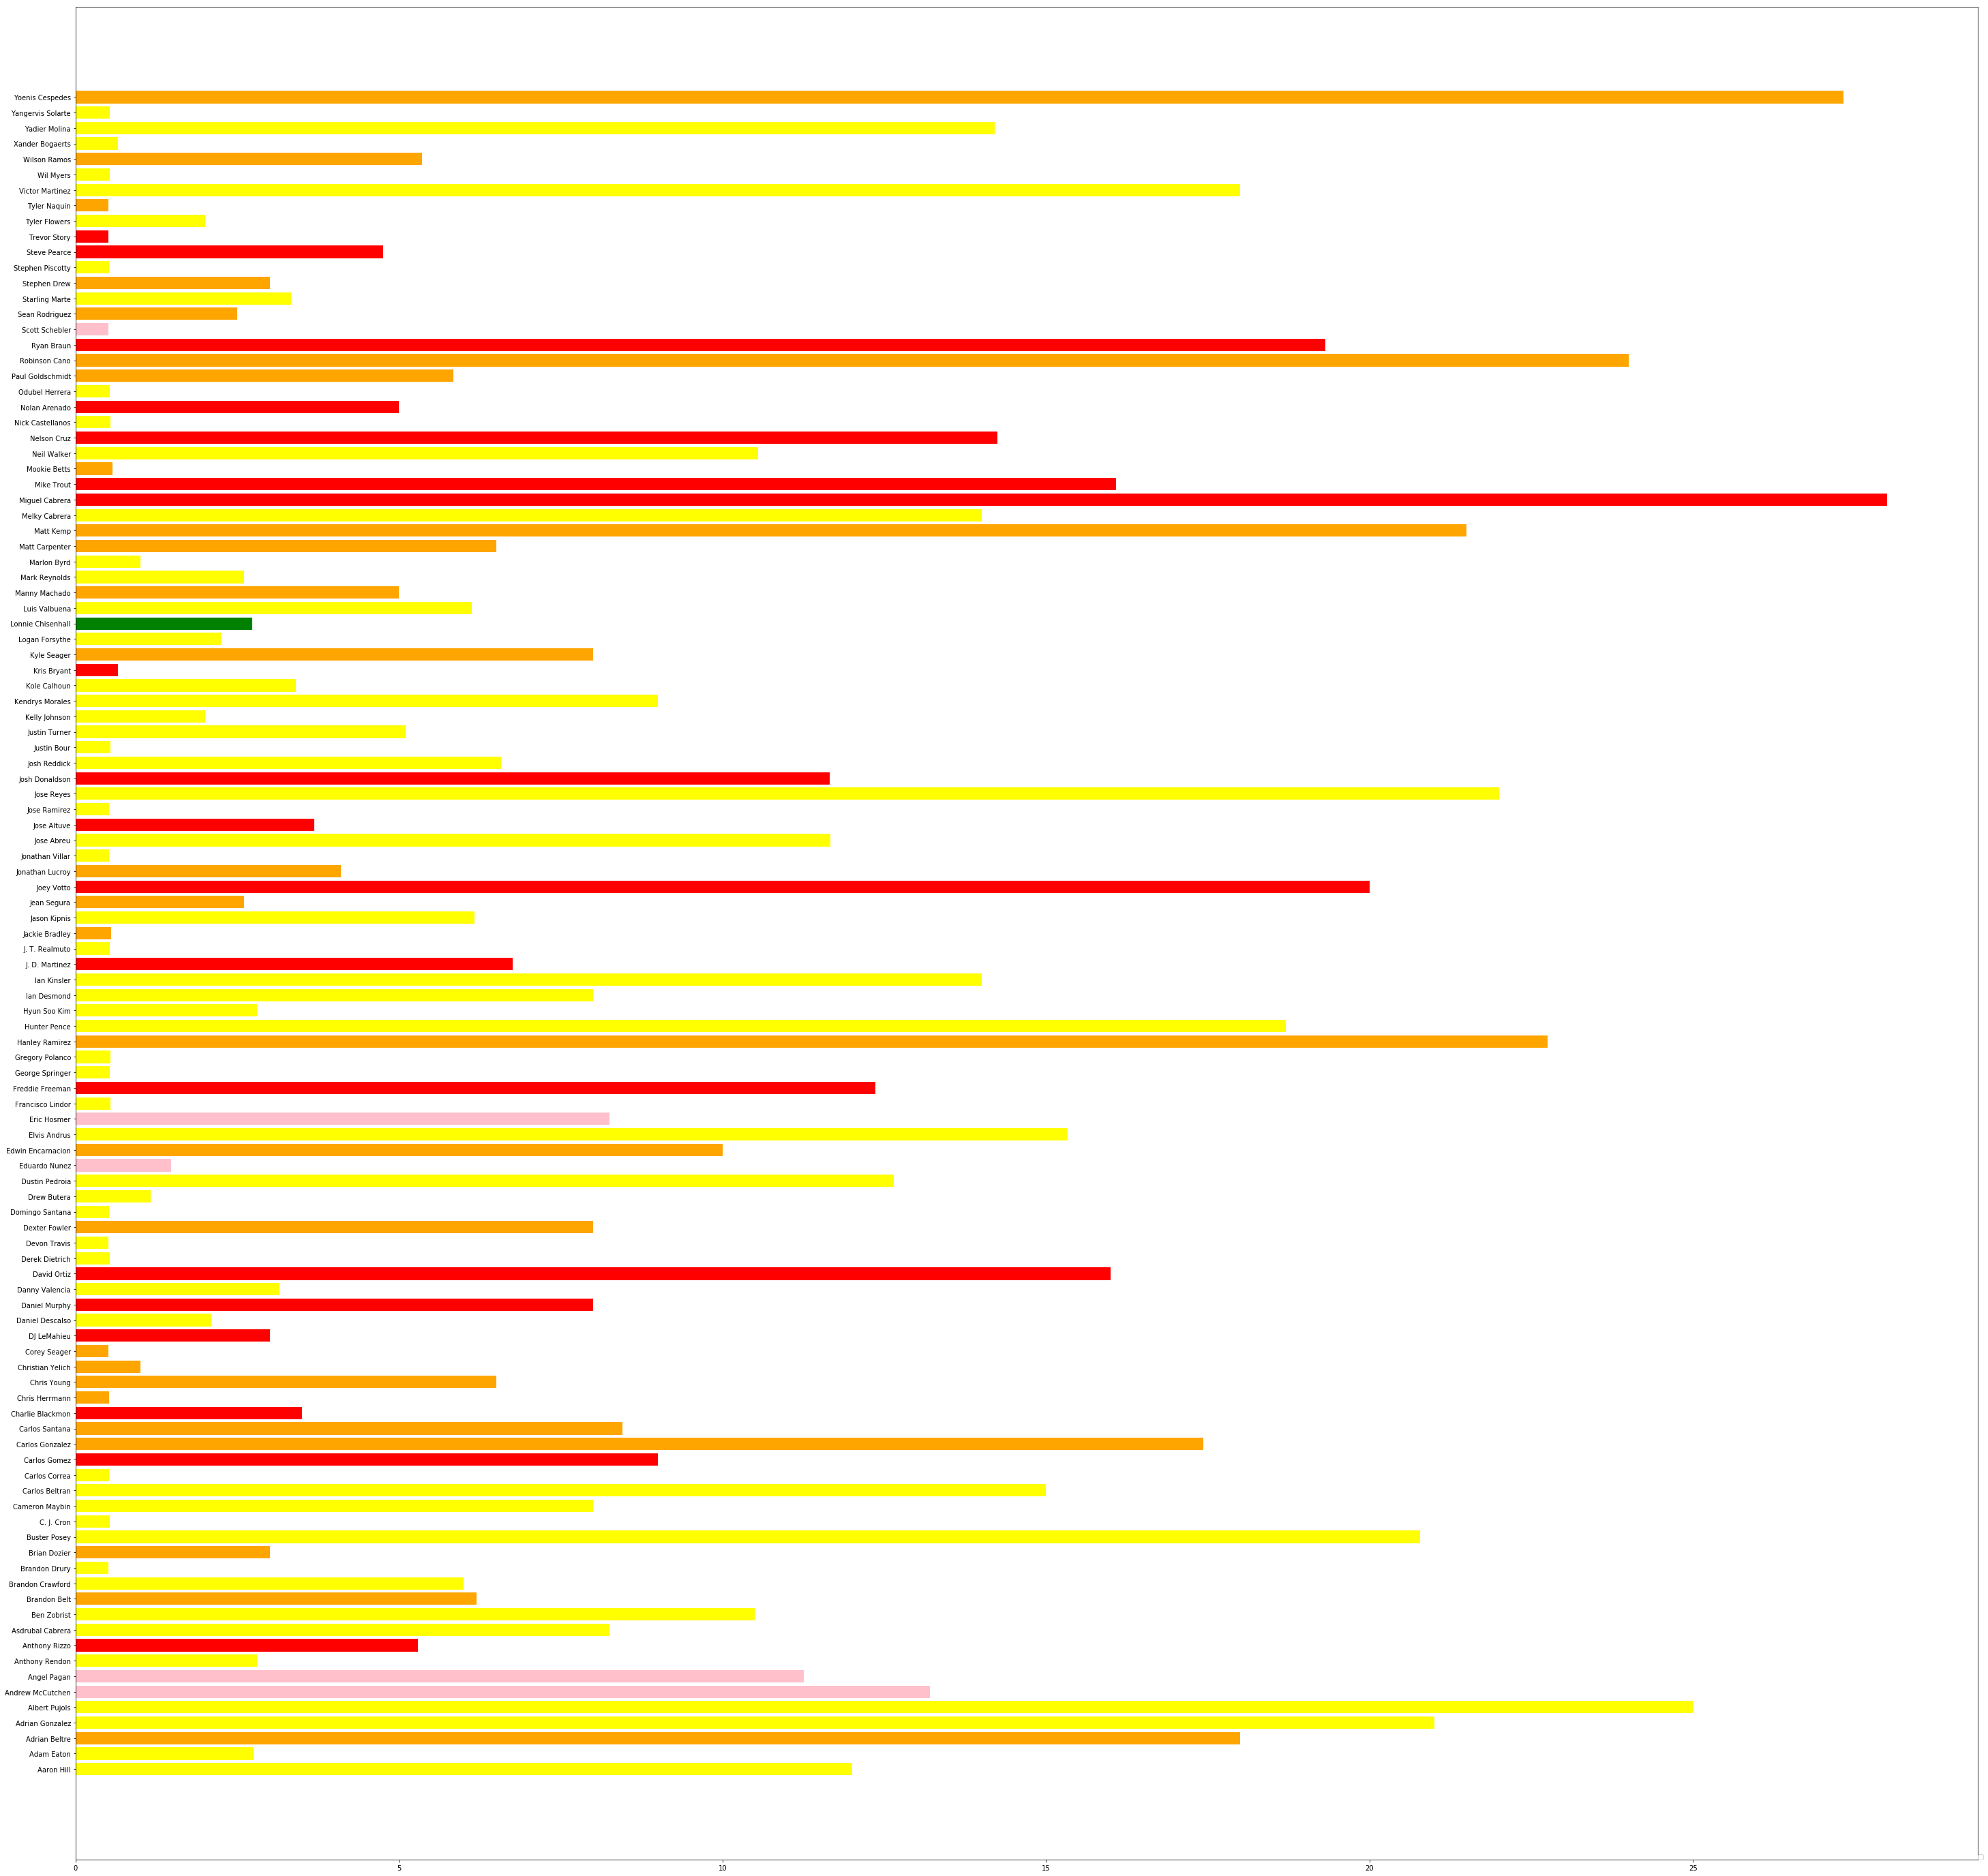

<Figure size 432x288 with 0 Axes>

In [0]:
fig, ax = plt.subplots() 

ax.spines['left'].set_visible(True)

ax.barh(obm.index, obm['Salary'], color=obm['colors'])
ax.set_facecolor('w')
ax.figure.set_size_inches(50, 50)

ax.legend(loc = (1,0))

plt.show()
plt.savefig('SalaryvsOPS.png', dpi=1000, orientation = 'portrait', transparent = False)

This graph demonstrates at different OPS levels (colors) how much above average MLB players are being paid in relation to others.

In [0]:
from google.colab import files
files.download('SalaryvsOPS.png')

In [0]:
def ranking(x):
  x = float(x)
  if x > 0.9:
    return 'Excellent'
  elif x <= 0.8999 and x > 0.8334:
    return 'Very Good'
  elif x <= 0.8333 and x > 0.7667:
    return 'Good'
  elif x <= 0.7666 and x > 0.7:
    return 'Average'
  elif x <= 0.6999 and x > .6334:
    return 'Fair'
  else:
    return 'Poor'

obm['Ranking'] = obm['OPS'].apply(ranking)
obm.head()
#

,OPS,Salary,colors,Ranking
Player Name,,,,
Aaron Hill,0.779881,12.00,yellow,Good
Adam Eaton,0.790055,2.75,yellow,Good
Adrian Beltre,0.879253,18.00,orange,Very Good
Adrian Gonzalez,0.783990,21.00,yellow,Good
Albert Pujols,0.780075,25.00,yellow,Good


In [0]:
o = obm.groupby('Ranking').sum()
obm.sort_values(['Salary'], ascending=True).head(10)

,OPS,Salary,colors,Ranking
Player Name,,,,
Trevor Story,0.908609,0.5075,red,Excellent
Tyler Naquin,0.885920,0.5075,orange,Very Good
Scott Schebler,0.761694,0.5075,pink,Average
Brandon Drury,0.786358,0.5089,yellow,Good
Corey Seager,0.877318,0.5100,orange,Very Good
Devon Travis,0.785445,0.5112,yellow,Good
Stephen Piscotty,0.800167,0.5125,yellow,Good
Jonathan Villar,0.826142,0.5129,yellow,Good
Domingo Santana,0.792350,0.5138,yellow,Good


In [0]:
wopa = pd2.groupby('Player Name')[['wOBA', 'Salary']]

In [0]:
mwopa = wopa.mean()
mwopa.head(10)

,wOBA,Salary
Player Name,,
Aaron Hill,0.345103,12.000000
Adam Eaton,0.349125,2.750000
Adrian Beltre,0.378991,18.000000
Adrian Gonzalez,0.340321,21.000000
Albert Pujols,0.337500,25.000000
Andrew McCutchen,0.334820,13.208333
Angel Pagan,0.329332,11.250000
Anthony Rendon,0.348496,2.800000
Anthony Rizzo,0.398713,5.285714


In [0]:
def newer_colors(x):
  x = float(x)
  if x > 0.4:
    return 'red'
  elif x <= 0.399 and x > 0.371:
    return 'orange'
  elif x <= 0.370 and x > 0.321:
    return 'yellow'
  elif x == .32:
    return 'pink'
  elif x <= 0.319 and x > .291:
    return 'blue'
  else:
    return 'green'

mwopa['Colors'] = mwopa['wOBA'].apply(newer_colors)
mwopa.head()

,wOBA,Salary,Colors
Player Name,,,
Aaron Hill,0.345103,12.00,yellow
Adam Eaton,0.349125,2.75,yellow
Adrian Beltre,0.378991,18.00,orange
Adrian Gonzalez,0.340321,21.00,yellow
Albert Pujols,0.337500,25.00,yellow


No handles with labels found to put in legend.


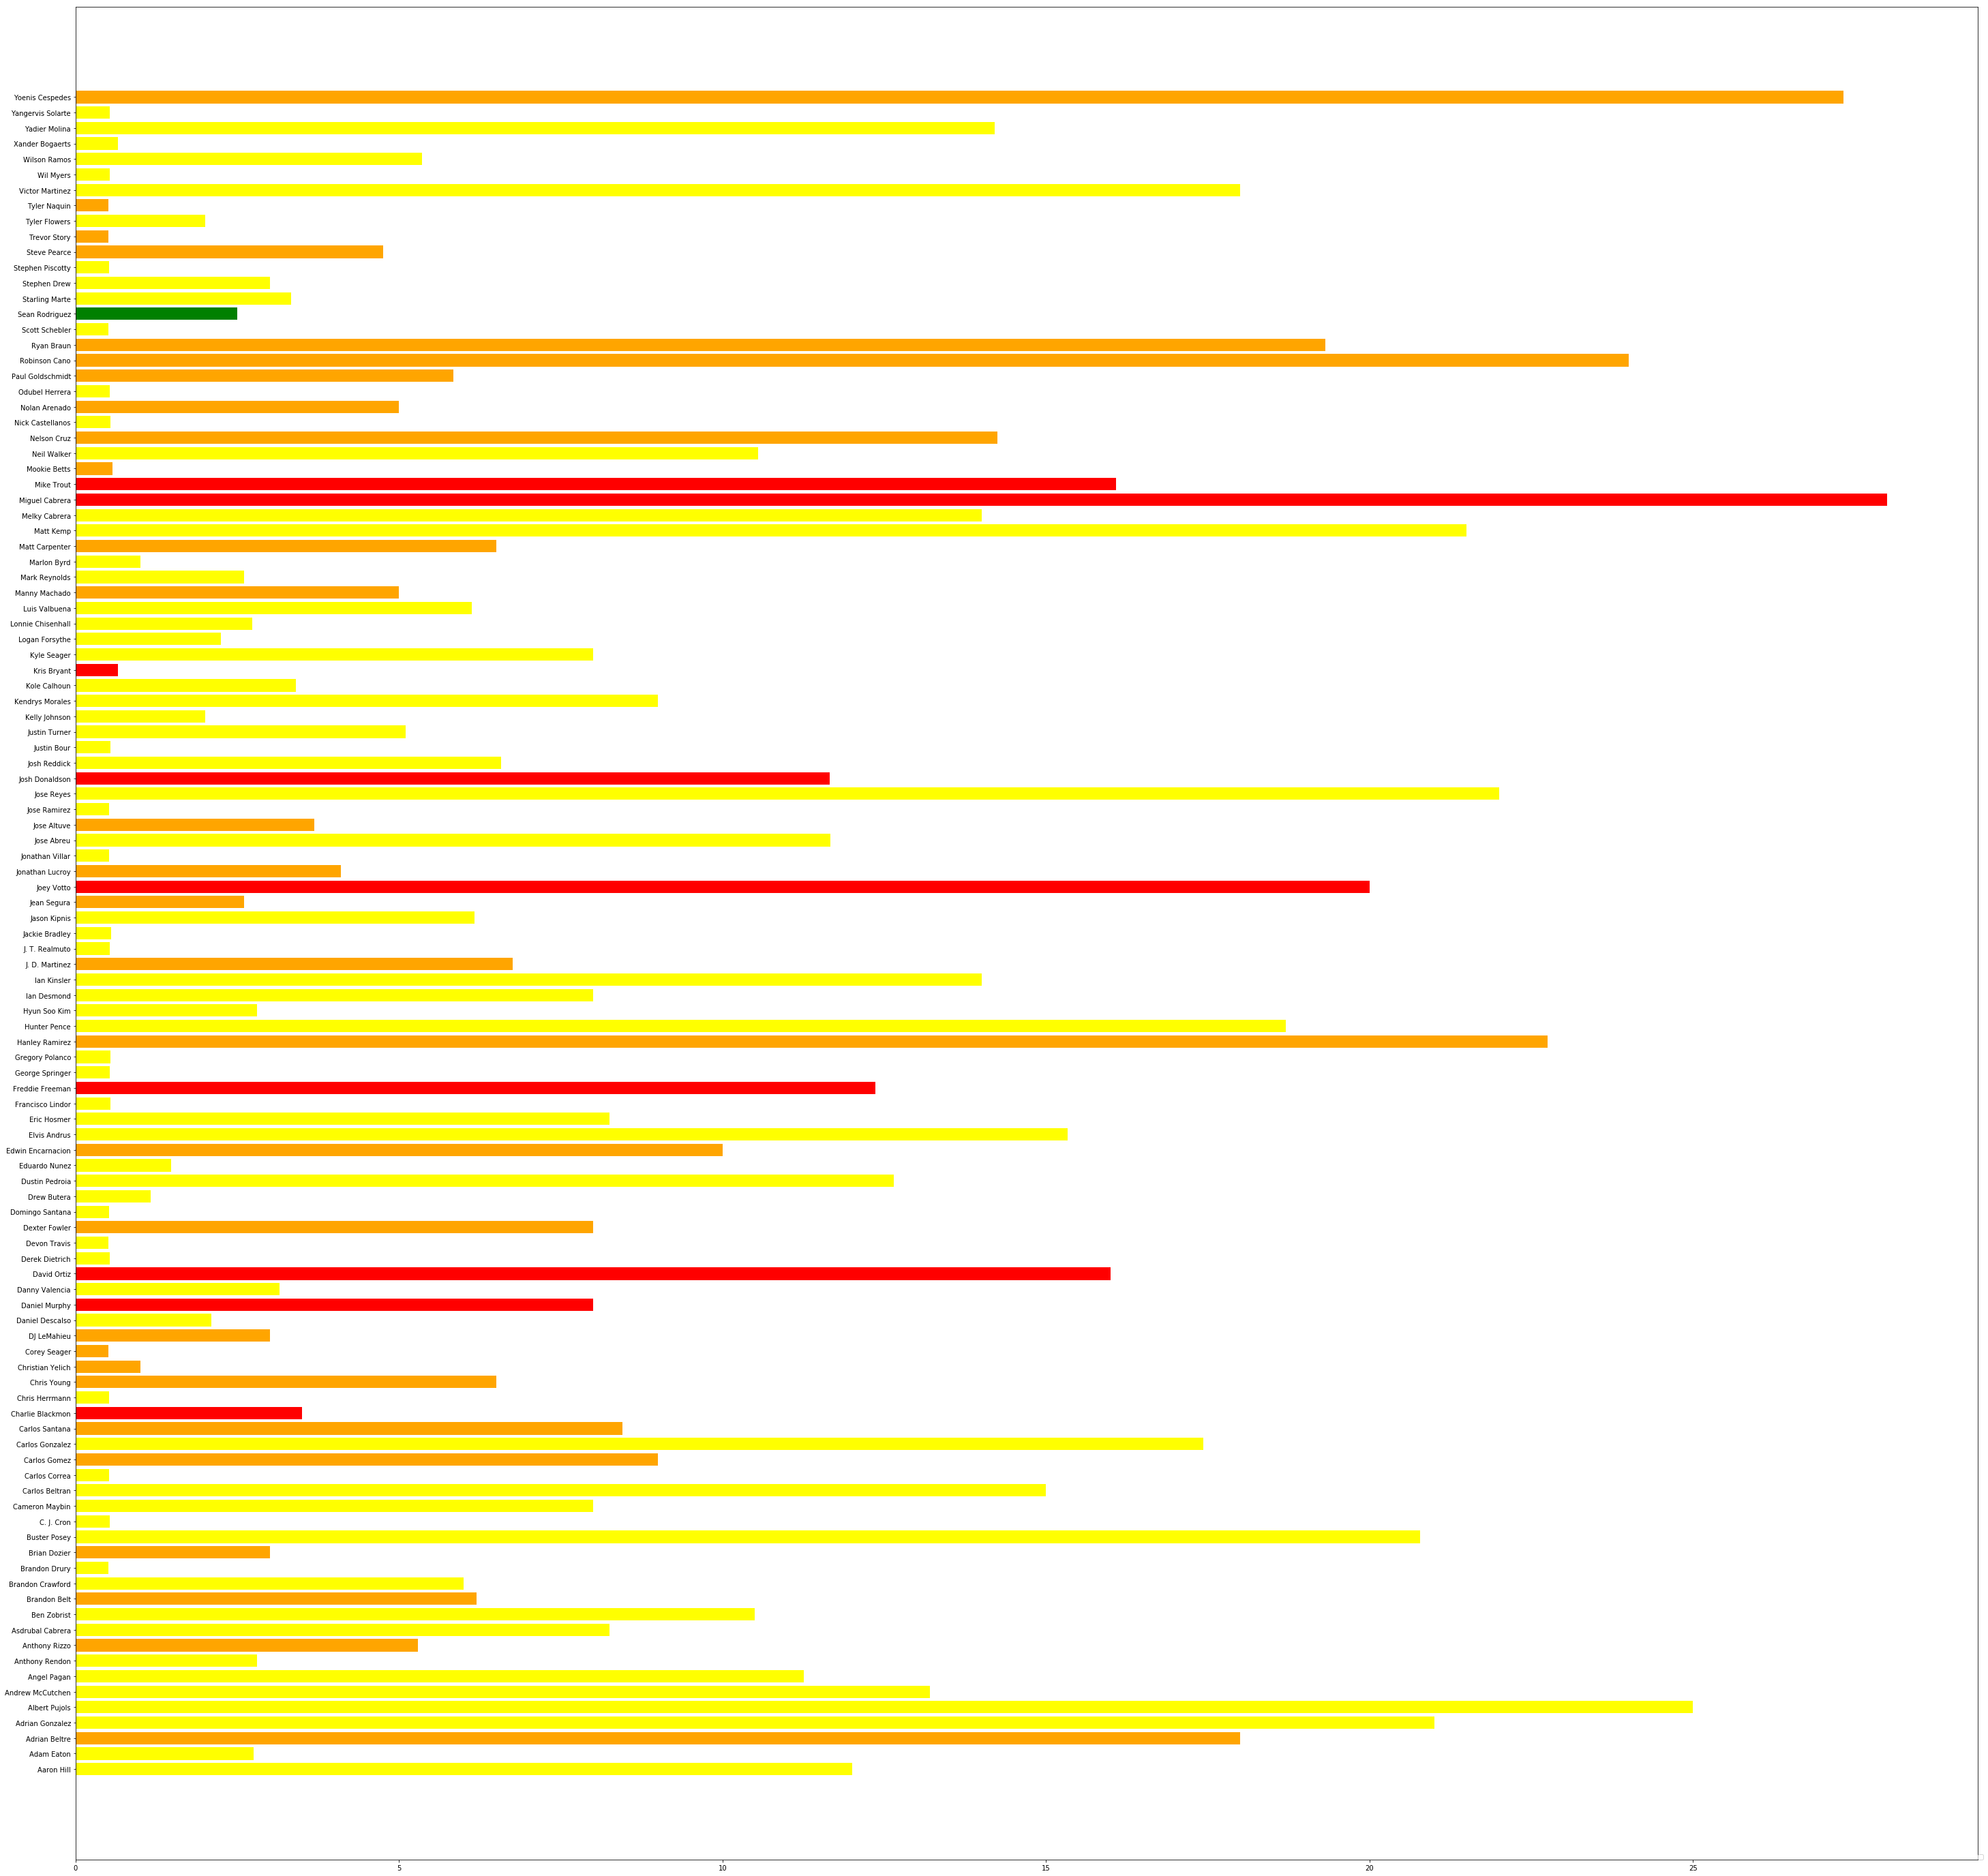

<Figure size 432x288 with 0 Axes>

In [0]:
fig, ax = plt.subplots() 

ax.spines['left'].set_visible(True)

ax.barh(mwopa.index, mwopa['Salary'], color=mwopa['Colors'])
ax.set_facecolor('w')
ax.figure.set_size_inches(50, 50)

ax.legend(loc = (1,0))

plt.show()
plt.savefig('SalaryvswOBA2.png', dpi=1000)

This graph demonstrates at different wOPA levels (colors), how much players are being paid in relation to others.

In [0]:
from google.colab import files 
files.download('SalaryvswOPA2.png')

In [0]:
def ranking2(x):
  x = float(x)
  if x > 0.4:
    return 'Excellent'
  elif x <= 0.399 and x > 0.371:
    return 'Very Good'
  elif x <= 0.370 and x > 0.321:
    return 'Good'
  elif x == .32:
    return 'Average'
  elif x <= 0.319 and x > .291:
    return 'Poor'
  else:
    return 'Very Bad'

mwopa['Rankings'] = mwopa['wOBA'].apply(ranking2)
mwopa.head()

,wOBA,Salary,Colors,Rankings
Player Name,,,,
Aaron Hill,0.345103,12.00,yellow,Good
Adam Eaton,0.349125,2.75,yellow,Good
Adrian Beltre,0.378991,18.00,orange,Very Good
Adrian Gonzalez,0.340321,21.00,yellow,Good
Albert Pujols,0.337500,25.00,yellow,Good


In [0]:
 w = mwopa.sort_values(['Salary'], ascending=True)
 w.head(10)

,wOBA,Salary,Colors,Rankings
Player Name,,,,
Trevor Story,0.388881,0.5075,orange,Very Good
Tyler Naquin,0.381448,0.5075,orange,Very Good
Scott Schebler,0.333857,0.5075,yellow,Good
Brandon Drury,0.341529,0.5089,yellow,Good
Corey Seager,0.379428,0.5100,orange,Very Good
Devon Travis,0.343271,0.5112,yellow,Good
Stephen Piscotty,0.351546,0.5125,yellow,Good
Jonathan Villar,0.361687,0.5129,yellow,Good
Domingo Santana,0.349537,0.5138,yellow,Good


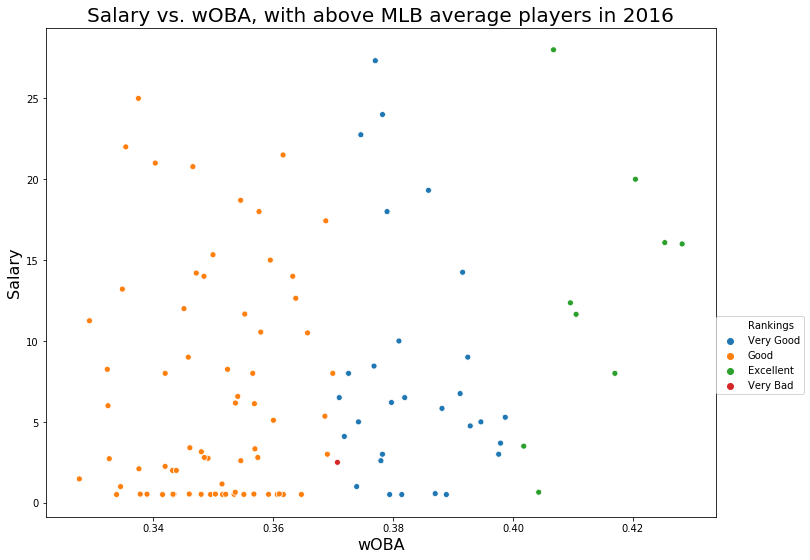

In [0]:
plt.figure(figsize=(12,9))

scatter = sns.scatterplot(x=w['wOBA'], y=w['Salary'], hue=w['Rankings'])
scatter.legend(loc=(1,0.25)) 

plt.title("Salary vs. wOBA, with above MLB average players in 2016", fontdict={'fontsize': 20})
plt.xlabel("wOBA", fontdict={'fontsize': 16})
plt.ylabel("Salary", fontdict={'fontsize': 16})

plt.savefig('SalaryvswOPA.png', dpi=1000, bbox_inches="tight") 

In [0]:
from google.colab import files
files.download('SalaryvswOPA.png')

Next I want to see which players are being underpaid and which ones are being overpaid for their wOPA statistic.

In [0]:
a = w[(w['Rankings'] == 'Excellent') & (w['Salary'] <= 1)] 
a

,wOBA,Salary,Colors,Rankings
Player Name,,,,
Kris Bryant,0.404294,0.652,red,Excellent


In [0]:
b = w[(w['Rankings'] == 'Very Good') & (w['Salary'] <= 1)]
b

,wOBA,Salary,Colors,Rankings
Player Name,,,,
Trevor Story,0.388881,0.5075,orange,Very Good
Tyler Naquin,0.381448,0.5075,orange,Very Good
Corey Seager,0.379428,0.5100,orange,Very Good
Mookie Betts,0.387023,0.5660,orange,Very Good
Christian Yelich,0.373924,1.0000,orange,Very Good


In [0]:
c = w[(w['Rankings'] == 'Good') & (w['Salary'] >= 20)]
c

,wOBA,Salary,Colors,Rankings
Player Name,,,,
Buster Posey,0.346590,20.777778,yellow,Good
Adrian Gonzalez,0.340321,21.000000,yellow,Good
Matt Kemp,0.361639,21.500000,yellow,Good
Jose Reyes,0.335396,22.000000,yellow,Good
Albert Pujols,0.337500,25.000000,yellow,Good


In [0]:
d = w[(w['Rankings'] == 'Very Good') & (w['Salary'] >= 20)]
d

,wOBA,Salary,Colors,Rankings
Player Name,,,,
Hanley Ramirez,0.374618,22.750000,orange,Very Good
Robinson Cano,0.378232,24.000000,orange,Very Good
Yoenis Cespedes,0.377028,27.328046,orange,Very Good


In [0]:
e = w[(w['Rankings'] == 'Excellent') & (w['Salary'] >= 20)]
e

,wOBA,Salary,Colors,Rankings
Player Name,,,,
Joey Votto,0.420438,20.0,red,Excellent
Miguel Cabrera,0.406762,28.0,red,Excellent


In [0]:
 f = pd.concat([a,b,c,d,e])
 f

,wOBA,Salary,Colors,Rankings
Player Name,,,,
Kris Bryant,0.404294,0.652000,red,Excellent
Trevor Story,0.388881,0.507500,orange,Very Good
Tyler Naquin,0.381448,0.507500,orange,Very Good
Corey Seager,0.379428,0.510000,orange,Very Good
Mookie Betts,0.387023,0.566000,orange,Very Good
Christian Yelich,0.373924,1.000000,orange,Very Good
Buster Posey,0.346590,20.777778,yellow,Good
Adrian Gonzalez,0.340321,21.000000,yellow,Good
Matt Kemp,0.361639,21.500000,yellow,Good


In [0]:
f.sort_values(['wOBA'], ascending=False)

,wOBA,Salary,Colors,Rankings
Player Name,,,,
Joey Votto,0.420438,20.000000,red,Excellent
Miguel Cabrera,0.406762,28.000000,red,Excellent
Kris Bryant,0.404294,0.652000,red,Excellent
Trevor Story,0.388881,0.507500,orange,Very Good
Mookie Betts,0.387023,0.566000,orange,Very Good
Tyler Naquin,0.381448,0.507500,orange,Very Good
Corey Seager,0.379428,0.510000,orange,Very Good
Robinson Cano,0.378232,24.000000,orange,Very Good
Yoenis Cespedes,0.377028,27.328046,orange,Very Good


In [0]:
teams = player_data
teams = teams[(teams['Season'] == 2016) & (teams['AB'] >= 50)]
teams.head()
teams.loc[:, '1B'] = teams['H'] - teams['2B'] - teams['3B'] - teams['HR']
teams.loc[:, 'uBB'] = teams['BB'] - teams['IBB']
teams.loc[:, 'wOBA'] = (0.69*teams['uBB'] + 0.72*teams['HBP'] + 0.89*teams['1B'] + 1.27*teams['2B'] + 1.62*teams['3B'] + 2.1*teams['HR'])/(teams['AB'] + teams['BB'] - teams['IBB'] + teams['SF'] + teams['HBP'])
teams.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,Team,Franchise,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA,1B,uBB,wOBA
81,abreujo02,Jose Abreu,255,75,R,R,2016,AL,CHA,Chicago White Sox,Chicago White Sox,159,624,67,183,32,1,25,100,0,47,125,11666667,7,15,0,9,702,125,40,0.355247
117,ackledu01,Dustin Ackley,205,73,L,R,2016,AL,NYA,New York Yankees,New York Yankees,28,61,6,9,0,0,0,4,0,8,9,3200000,0,0,0,1,70,9,8,0.193286
124,adamecr01,Cristhian Adames,185,72,B,R,2016,NL,COL,Colorado Rockies,Colorado Rockies,121,225,25,49,7,3,2,17,2,24,47,509500,0,4,3,0,256,37,24,0.277945
132,adamsma01,Matt Adams,245,75,L,R,2016,NL,SLN,St. Louis Cardinals,St. Louis Cardinals,118,297,37,74,18,0,16,54,0,25,81,1650000,1,2,0,3,328,40,24,0.337607
162,adriaeh01,Ehire Adrianza,170,73,B,R,2016,NL,SFN,San Francisco Giants,San Francisco Giants,40,63,3,16,2,0,2,7,0,2,13,512500,0,2,4,0,71,12,2,0.302090


I want to see which MLB teams in 2016 paid their players more on average and what the average team wOPA was as well.

In [0]:
teams2016 =teams.groupby('Franchise')
teams2016 = teams2016.sum()
teams2016 = teams2016.sort_values(['salary'], ascending= False)
print(teams2016['salary'])

Franchise
New York Mets                    143405420
New York Yankees                 138888599
Chicago Cubs                     132283168
Texas Rangers                    123263953
San Francisco Giants             114108145
Detroit Tigers                   112974000
Washington Nationals             107491272
Baltimore Orioles                 97393192
Toronto Blue Jays                 96824300
Los Angeles Dodgers               91427163
St. Louis Cardinals               87946500
Seattle Mariners                  78943900
Boston Red Sox                    77507511
Los Angeles Angels of Anaheim     65378833
Atlanta Braves                    64161625
Kansas City Royals                60270175
Cincinnati Reds                   58273599
Chicago White Sox                 57960667
Arizona Diamondbacks              57602563
San Diego Padres                  53988900
Cleveland Indians                 52416800
Colorado Rockies                  50315571
Oakland Athletics                 49931167
F

In [0]:
teams2 = teams.Franchise.value_counts()
teams2

Chicago Cubs                     18
New York Mets                    18
Los Angeles Dodgers              16
Florida Marlins                  16
Tampa Bay Rays                   16
Washington Nationals             16
San Francisco Giants             16
Cleveland Indians                15
St. Louis Cardinals              15
Detroit Tigers                   15
Philadelphia Phillies            15
Texas Rangers                    15
Arizona Diamondbacks             15
Colorado Rockies                 15
Cincinnati Reds                  14
Toronto Blue Jays                14
Pittsburgh Pirates               14
Baltimore Orioles                14
San Diego Padres                 13
Milwaukee Brewers                13
Boston Red Sox                   13
New York Yankees                 13
Chicago White Sox                13
Seattle Mariners                 13
Oakland Athletics                12
Atlanta Braves                   12
Los Angeles Angels of Anaheim    12
Minnesota Twins             

In [0]:
teams2016['Player Count'] = teams.Franchise.value_counts()
teams2016.head()

,weight,height,Season,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA,1B,uBB,wOBA,Player Count
Franchise,,,,,,,,,,,,,,,,,,,,,,,,
New York Mets,3905,1323,36288,1461,4417,570,1093,199,15,193,534,42,451,1060,143405420,37,50,13,30,4998,686,414,5.502972,18
New York Yankees,2713,952,26208,1435,4812,583,1214,213,20,150,558,67,410,977,138888599,15,38,17,42,5334,831,395,3.911891,13
Chicago Cubs,3876,1344,36288,1645,5021,751,1287,266,28,184,709,62,614,1204,132283168,44,89,38,35,5841,809,570,5.421709,18
Texas Rangers,3215,1084,30240,1317,4453,638,1179,226,17,181,625,91,346,962,123263953,22,59,11,29,4920,755,324,4.829568,15
San Francisco Giants,3309,1179,32256,1457,4802,622,1260,247,48,108,587,78,513,904,114108145,38,32,30,43,5458,857,475,4.734193,16


In [0]:
teams2016['wOBA per Player'] = teams2016['wOBA'] / teams2016['Player Count']
teams2016['Salary per Player'] = teams2016['salary'] / teams2016['Player Count']
teams2016['Salary per Player'] *= (1/1000000)
teams2016.head()

,weight,height,Season,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA,1B,uBB,wOBA,Player Count,wOBA per Player,Salary per Player
Franchise,,,,,,,,,,,,,,,,,,,,,,,,,,
New York Mets,3905,1323,36288,1461,4417,570,1093,199,15,193,534,42,451,1060,143405420,37,50,13,30,4998,686,414,5.502972,18,0.305721,7.966968
New York Yankees,2713,952,26208,1435,4812,583,1214,213,20,150,558,67,410,977,138888599,15,38,17,42,5334,831,395,3.911891,13,0.300915,10.683738
Chicago Cubs,3876,1344,36288,1645,5021,751,1287,266,28,184,709,62,614,1204,132283168,44,89,38,35,5841,809,570,5.421709,18,0.301206,7.349065
Texas Rangers,3215,1084,30240,1317,4453,638,1179,226,17,181,625,91,346,962,123263953,22,59,11,29,4920,755,324,4.829568,15,0.321971,8.217597
San Francisco Giants,3309,1179,32256,1457,4802,622,1260,247,48,108,587,78,513,904,114108145,38,32,30,43,5458,857,475,4.734193,16,0.295887,7.131759


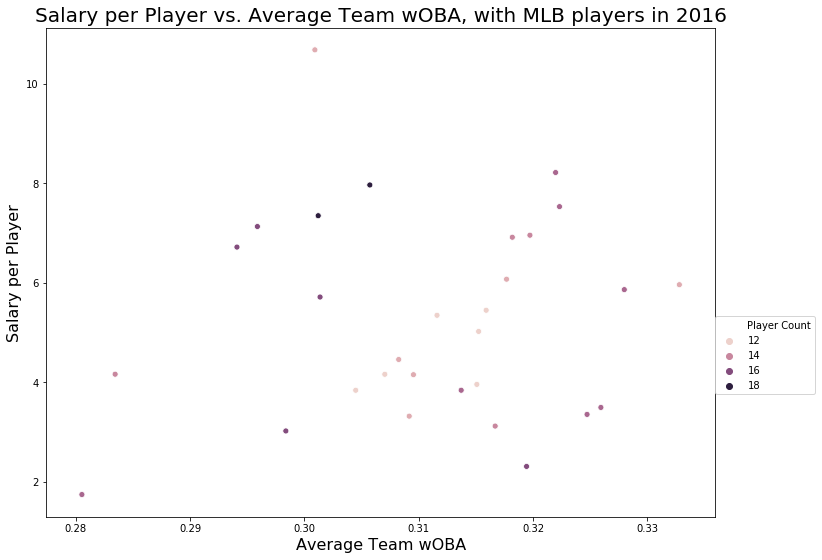

In [0]:
plt.figure(figsize=(12,9))

scatter = sns.scatterplot(x=teams2016['wOBA per Player'], y=teams2016['Salary per Player'], hue=teams2016['Player Count'])
scatter.legend(loc=(1,0.25)) # specify the legend location manually, otherwise it overlaps with the graph

plt.title("Salary per Player vs. Average Team wOBA, with MLB players in 2016", fontdict={'fontsize': 20})
plt.xlabel("Average Team wOBA", fontdict={'fontsize': 16})
plt.ylabel("Salary per Player", fontdict={'fontsize': 16})

plt.savefig('TeamsalaryvswOBA.png', dpi=1000, bbox_inches="tight")